# **1. Perkenalan Dataset**


Dataset berjudul **Beverages Sales**

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (Kaggle, UCI ML Repository, Open Data) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**:
   Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('synthetic_beverage_sales_data.csv', low_memory=False)
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53.0,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90.0,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73.0,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59.0,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35.0,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# 1. memahami struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328366 entries, 0 to 1328365
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Order_ID       1328366 non-null  object 
 1   Customer_ID    1328366 non-null  object 
 2   Customer_Type  1328366 non-null  object 
 3   Product        1328366 non-null  object 
 4   Category       1328366 non-null  object 
 5   Unit_Price     1328365 non-null  float64
 6   Quantity       1328365 non-null  float64
 7   Discount       1328365 non-null  float64
 8   Total_Price    1328365 non-null  float64
 9   Region         1328365 non-null  object 
 10  Order_Date     1328365 non-null  object 
dtypes: float64(4), object(7)
memory usage: 111.5+ MB


In [4]:
# mengambil sample dataset sebanyak 10000 agar komputasi tidak terlalu berat karena dataset terlalu besar
df = df.sample(n=100000, random_state=42, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       100000 non-null  object 
 1   Customer_ID    100000 non-null  object 
 2   Customer_Type  100000 non-null  object 
 3   Product        100000 non-null  object 
 4   Category       100000 non-null  object 
 5   Unit_Price     100000 non-null  float64
 6   Quantity       100000 non-null  float64
 7   Discount       100000 non-null  float64
 8   Total_Price    100000 non-null  float64
 9   Region         100000 non-null  object 
 10  Order_Date     100000 non-null  object 
dtypes: float64(4), object(7)
memory usage: 8.4+ MB


In [5]:
# 2. menangani data yang hilang
df.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


Tidak terdapat missing value

In [6]:
# 3. analisis distribusi dan korelasi
# statistik deskriptif
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.862809,23.151180,0.029720,130.437315
std,14.862374,26.938754,0.044899,509.618512
min,0.320000,1.000000,0.000000,0.320000
25%,1.050000,6.000000,0.000000,8.400000
50%,1.750000,11.000000,0.000000,21.090000
75%,3.210000,30.000000,0.050000,69.550000
max,141.320000,100.000000,0.150000,11914.450000


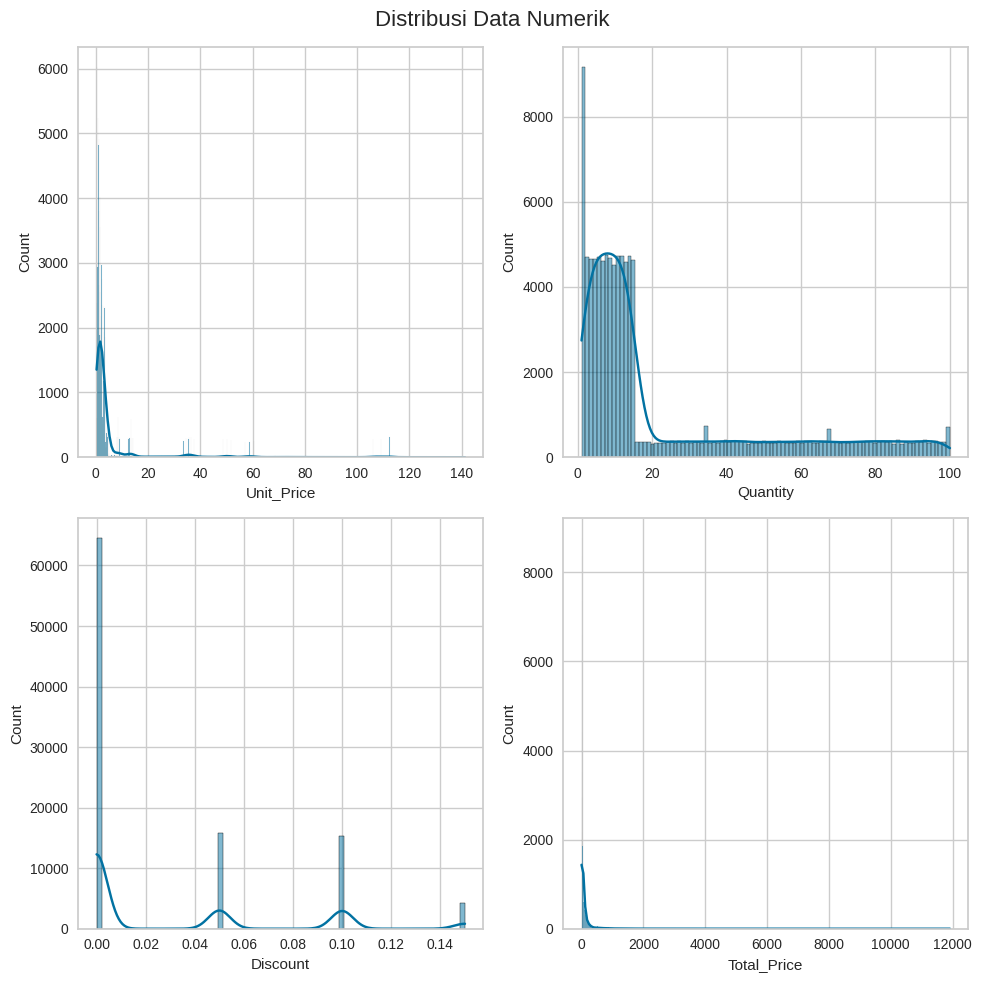

In [7]:
# mengambil kolom numerik
numeric = df.select_dtypes(include=['number']).columns

# visualisasi distribusi data numerik menggunakan histogram
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(numeric):
  sns.histplot(df[col], ax=axes[i//2, i%2], kde=True)
plt.suptitle('Distribusi Data Numerik', fontsize=16)
plt.tight_layout()
plt.show()

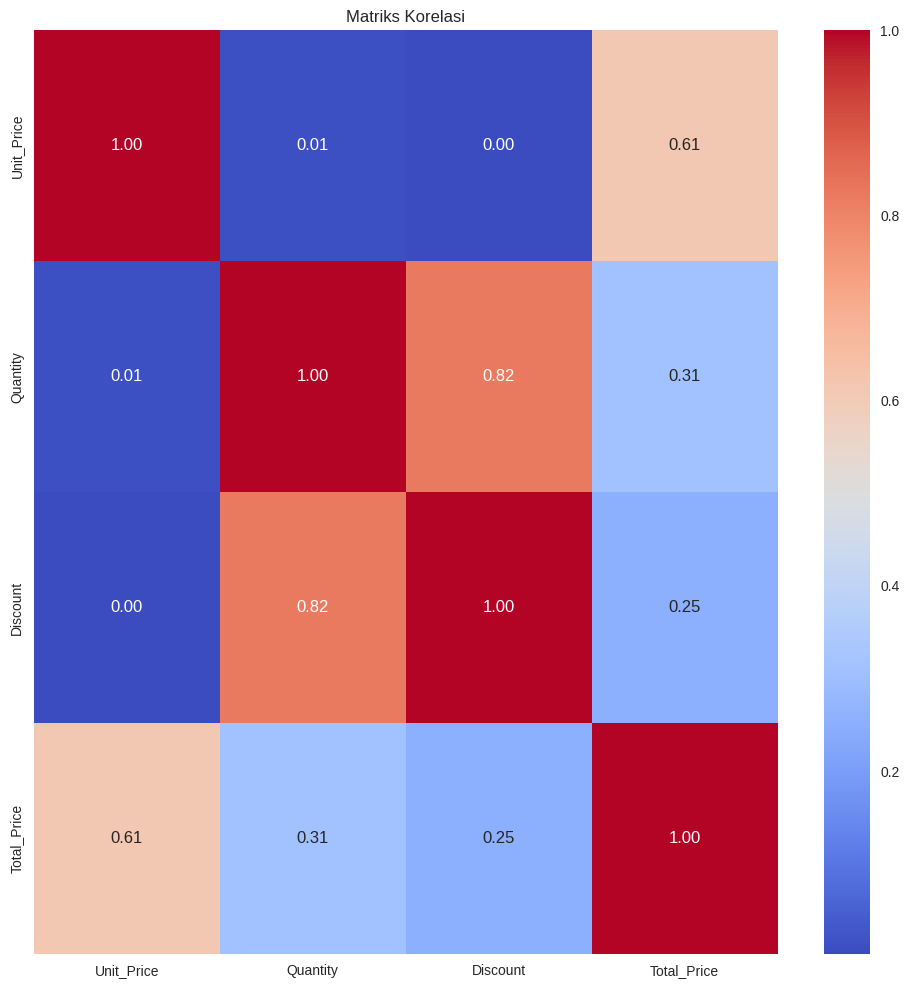

In [8]:
# periksa hubungan antara variabel dengan matriks korelasi dan heatmap
plt.figure(figsize=(12,12))
correlation_matrix = df[numeric].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

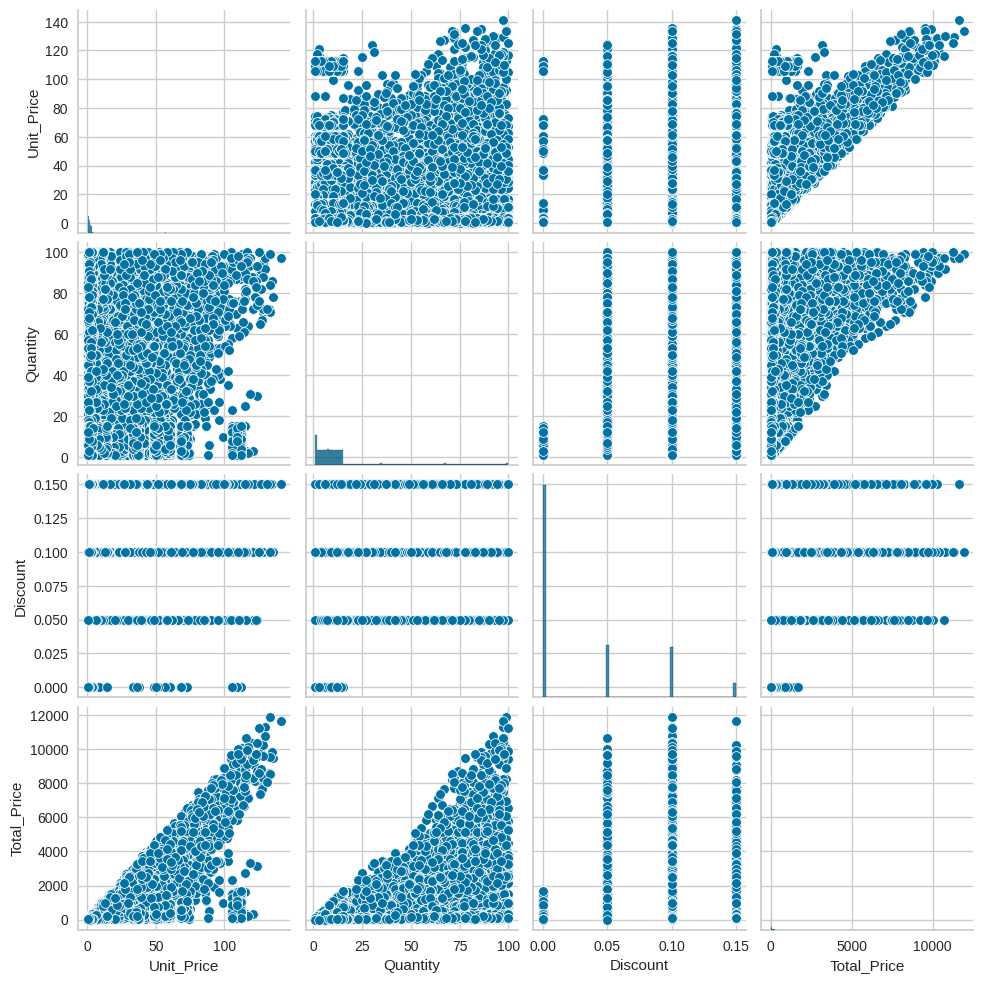

In [9]:
# periksa hubungan dengan pairplot
sns.pairplot(df[numeric])
plt.show()

Text(0.5, 1.0, 'Distribusi region')

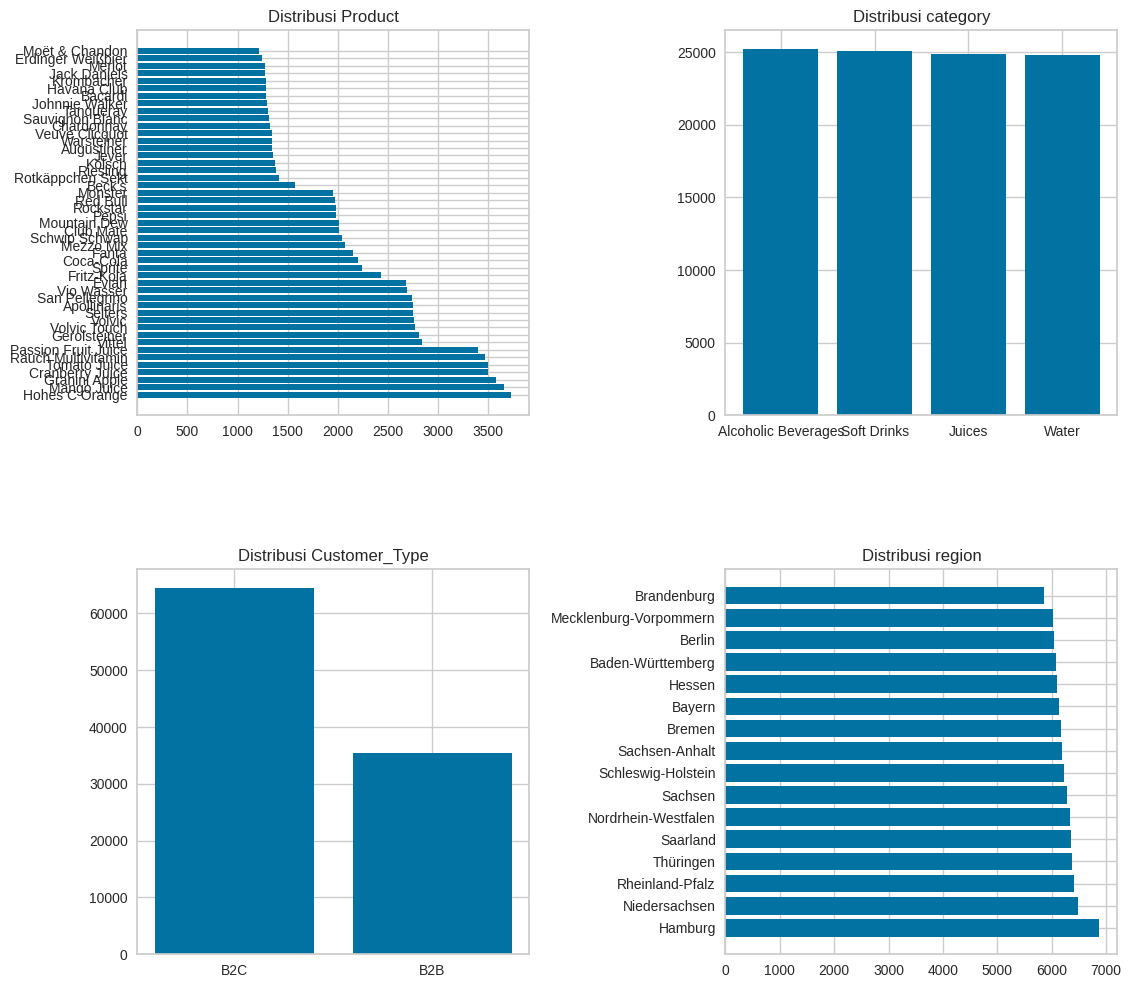

In [10]:
# 4. visualisasi data
categorical = ['Product', 'Category', 'CustomerType', 'Region']

# visualisasi distribusi data
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.subplots_adjust(left=0.2)  # Tambah ruang di kiri agar label Y lebih leluasa

# diagram distribusi product
product_count = df['Product'].value_counts()
axes[0, 0].barh(product_count.index, product_count.values)
axes[0, 0].set_title('Distribusi Product')

# diagram distribusi category
category_count = df['Category'].value_counts()
axes[0, 1].bar(category_count.index, category_count.values)
axes[0, 1].set_title('Distribusi category')

# diagram distribusi customerType
customerType_count = df['Customer_Type'].value_counts()
axes[1, 0].bar(customerType_count.index, customerType_count.values)
axes[1, 0].set_title('Distribusi Customer_Type')

# diagram distribusi region
region_count = df['Region'].value_counts()
axes[1, 1].barh(region_count.index, region_count.values)
axes[1, 1].set_title('Distribusi region')

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [11]:
# 1. menghapus atau menangani missing values
print("Jumlah missing values:", df.isnull().sum().sum())

# 2. Menghapus data duplicate
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah missing values: 0
Jumlah data duplikat: 0


karena tidak ada missing value dan data duplikat, maka bagian ini di lewati

In [12]:
# 3. normalisasi atau standardisasi fitur
minMaxScaler = MinMaxScaler()
standardScaler = StandardScaler()

# normalisasi
df_normalisasi = df.copy()
df_normalisasi[['Quantity', 'Unit_Price']] = minMaxScaler.fit_transform(df_normalisasi[['Quantity', 'Unit_Price']])

# standardisasi
df_standardisasi = df_normalisasi.copy()
df_standardisasi[[ 'Total_Price']] = standardScaler.fit_transform(df_standardisasi[['Total_Price']])
display(df_standardisasi.head())

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD104277,CUS822,B2C,Johnnie Walker,Alcoholic Beverages,0.249645,0.030303,0.00,0.022846,Thüringen,2021-08-23
1,ORD208413,CUS4917,B2B,Coca-Cola,Soft Drinks,0.002908,0.181818,0.05,-0.230090,Hamburg,2022-10-23
2,ORD76868,CUS3616,B2C,Coca-Cola,Soft Drinks,0.005106,0.131313,0.00,-0.227382,Berlin,2021-03-15
3,ORD387831,CUS1863,B2B,Havana Club,Alcoholic Beverages,0.146170,0.000000,0.05,-0.216942,Berlin,2022-06-04
4,ORD260398,CUS2696,B2B,Volvic Touch,Water,0.002270,0.202020,0.05,-0.230894,Bayern,2021-07-30


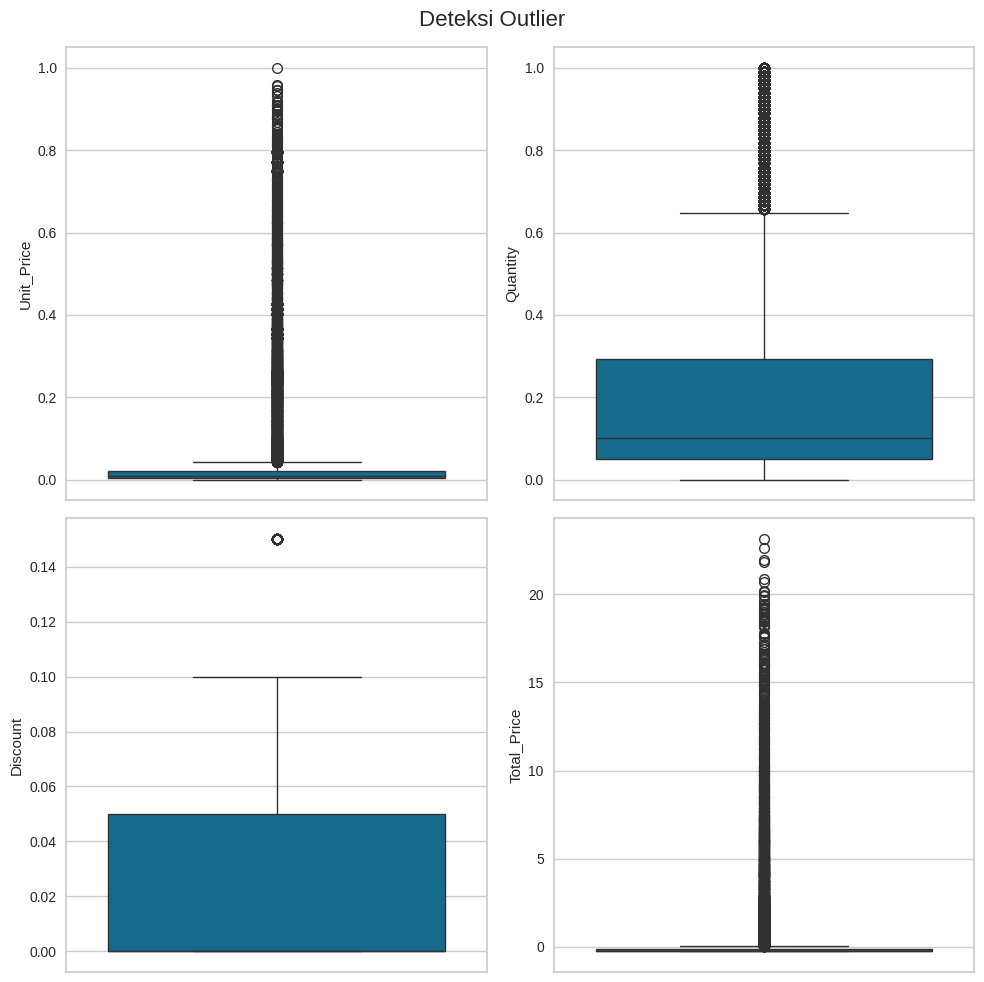

In [13]:
# 4. deteksi outlier
Q1 = df_standardisasi[numeric].quantile(0.25)
Q3 = df_standardisasi[numeric].quantile(0.75)
IQR = Q3 - Q1

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate (numeric):
  sns.boxplot(df_standardisasi[col], ax=axes[i//2, i%2])
plt.suptitle('Deteksi Outlier', fontsize=16)
plt.tight_layout()
plt.show()

In [14]:
print("Jumlah data sebelum menghapus outlier:", df_standardisasi.shape[0])

Jumlah data sebelum menghapus outlier: 100000


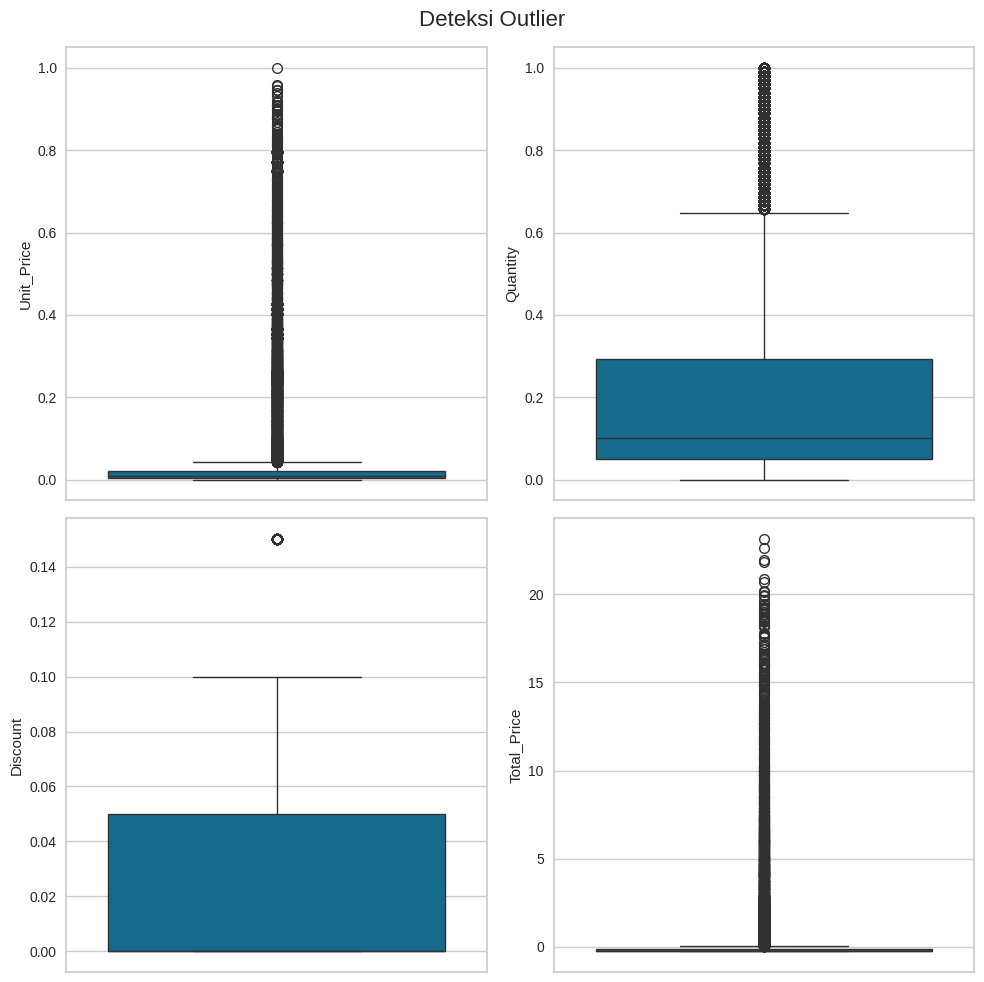

Jumlah data setelah menghapus outlier: 75226


In [15]:
# hapus outlier
# filter df untuk hanya simpan baris yang tidak mengandung outlier pada kolom numerik
condition = ~((df_standardisasi[numeric] < (Q1 - 1.5 * IQR)) | (df_standardisasi[numeric] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filter_numeric = df_standardisasi[condition]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(numeric):
  sns.boxplot(df_standardisasi[col], ax=axes[i//2, i%2])
plt.suptitle('Deteksi Outlier', fontsize=16)
plt.tight_layout()
plt.show()

print("Jumlah data setelah menghapus outlier:", df_filter_numeric.shape[0])

In [16]:
# 5. encoding
labelEncoder = LabelEncoder()

df_label = df_filter_numeric.copy()

df_label[['Product', 'Category', 'Region']] = df_filter_numeric[['Product', 'Category', 'Region']].apply(labelEncoder.fit_transform)

df_encoding = pd.get_dummies(df_label, columns=['Customer_Type'])
df_encoding.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C
1,ORD208413,CUS4917,5,2,0.002908,0.181818,0.05,-0.230090,5,2022-10-23,True,False
2,ORD76868,CUS3616,5,2,0.005106,0.131313,0.00,-0.227382,2,2021-03-15,False,True
4,ORD260398,CUS2696,38,3,0.002270,0.202020,0.05,-0.230894,1,2021-07-30,True,False
6,ORD342498,CUS5285,5,2,0.002908,0.080808,0.10,-0.244355,3,2023-10-04,True,False
7,ORD267293,CUS5458,9,2,0.005957,0.010101,0.00,-0.251400,14,2021-06-15,False,True


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [17]:
# memilih fitur yang akan digunakan
features = ['Discount', 'Category', 'Total_Price', 'Quantity', 'Unit_Price', 'Customer_Type_B2B', 'Customer_Type_B2C']
X = df_encoding[features]
X

,Discount,Category,Total_Price,Quantity,Unit_Price,Customer_Type_B2B,Customer_Type_B2C
1,0.05,2,-0.230090,0.181818,0.002908,True,False
2,0.00,2,-0.227382,0.131313,0.005106,False,True
4,0.05,3,-0.230894,0.202020,0.002270,True,False
6,0.10,2,-0.244355,0.080808,0.002908,True,False
7,0.00,2,-0.251400,0.010101,0.005957,False,True
...,...,...,...,...,...,...,...
99994,0.00,0,-0.137275,0.131313,0.028369,False,True
99995,0.00,1,-0.198340,0.070707,0.023759,False,True
99996,0.00,3,-0.231581,0.080808,0.007518,False,True
99997,0.00,2,-0.246651,0.020202,0.008936,False,True


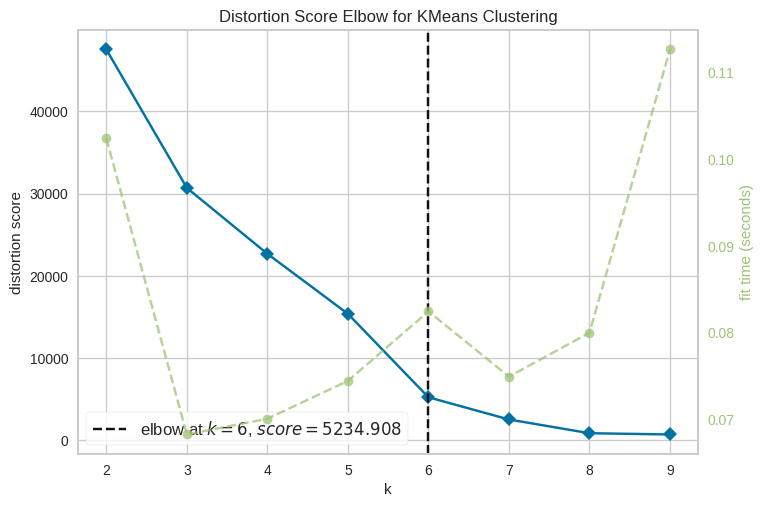

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X)
visualizer.show()

In [19]:
# pca untuk reduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=np.int64(6), random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [20]:
# hitung silhouette score
silhouette = silhouette_score(X_pca, kmeans.labels_)
print(f'Silhouette Score for K = {optimal_k}:', silhouette)

Silhouette Score for K = 6: 0.9063778730150523


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Silhouette score sudah mencapai 0.906

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

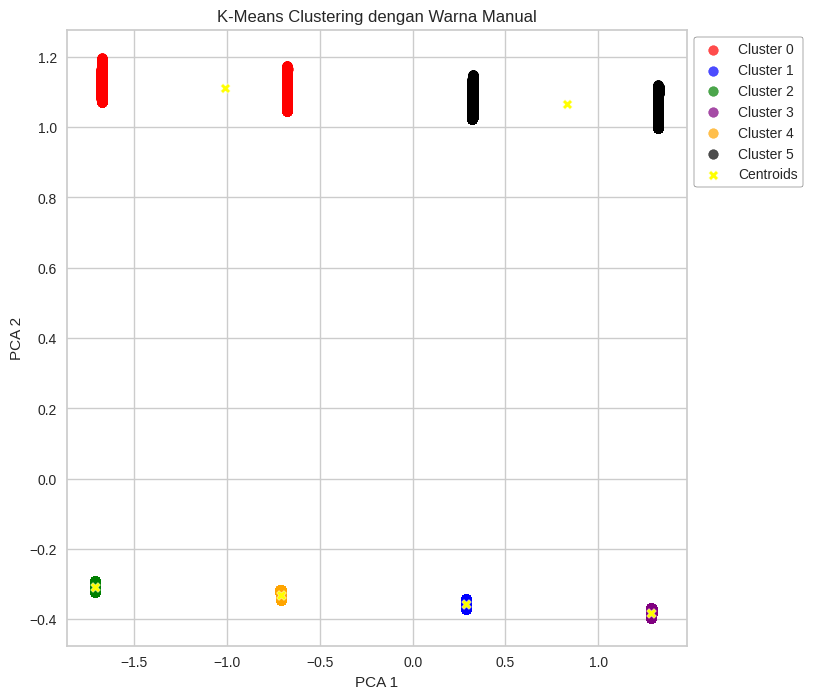

In [21]:
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']  # Sesuaikan jumlah cluster

plt.figure(figsize=(8, 8))
for i in range(6):
    plt.scatter(X_pca[kmeans.labels_ == i, 0],
                X_pca[kmeans.labels_ == i, 1],
                label=f'Cluster {i}',
                color=cluster_colors[i], alpha=0.7)

# Centroid warna hitam
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='yellow', marker='X', label='Centroids', s=50, edgecolors='white')

plt.title('K-Means Clustering dengan Warna Manual')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, edgecolor='black')
plt.show()



## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [22]:
# menambahkan hasil label cluster ke dataframe
df_label = df_filter_numeric.copy()
df_label['cluster'] = kmeans.labels_
df_label.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,cluster
1,ORD208413,CUS4917,B2B,Coca-Cola,Soft Drinks,0.002908,0.181818,0.05,-0.230090,Hamburg,2022-10-23,5
2,ORD76868,CUS3616,B2C,Coca-Cola,Soft Drinks,0.005106,0.131313,0.00,-0.227382,Berlin,2021-03-15,1
4,ORD260398,CUS2696,B2B,Volvic Touch,Water,0.002270,0.202020,0.05,-0.230894,Bayern,2021-07-30,5
6,ORD342498,CUS5285,B2B,Coca-Cola,Soft Drinks,0.002908,0.080808,0.10,-0.244355,Brandenburg,2023-10-04,5
7,ORD267293,CUS5458,B2C,Fanta,Soft Drinks,0.005957,0.010101,0.00,-0.251400,Schleswig-Holstein,2021-06-15,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [23]:
# invers transform untuk mengembalikan data seperti semula
df_label[['Quantity', 'Unit_Price']] = minMaxScaler.inverse_transform(df_label[['Quantity', 'Unit_Price']])
df_label[['Total_Price']] = standardScaler.inverse_transform(df_label[['Total_Price']])
df_label.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,cluster
1,ORD208413,CUS4917,B2B,Coca-Cola,Soft Drinks,0.73,19.0,0.05,13.18,Hamburg,2022-10-23,5
2,ORD76868,CUS3616,B2C,Coca-Cola,Soft Drinks,1.04,14.0,0.00,14.56,Berlin,2021-03-15,1
4,ORD260398,CUS2696,B2B,Volvic Touch,Water,0.64,21.0,0.05,12.77,Bayern,2021-07-30,5
6,ORD342498,CUS5285,B2B,Coca-Cola,Soft Drinks,0.73,9.0,0.10,5.91,Brandenburg,2023-10-04,5
7,ORD267293,CUS5458,B2C,Fanta,Soft Drinks,1.16,2.0,0.00,2.32,Schleswig-Holstein,2021-06-15,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [24]:
# cek data per cluster
cluster_count = df_label['cluster'].value_counts()
print('jumlah data tiap', cluster_count)

jumlah data tiap cluster
1    16155
4    16053
3    15900
5    10800
2     8806
0     7512
Name: count, dtype: int64


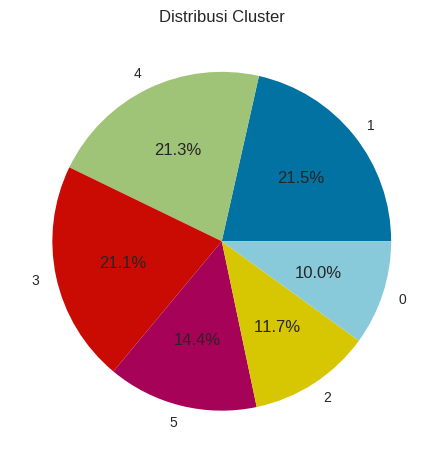

In [25]:
plt.pie(cluster_count, labels=cluster_count.index, autopct='%1.1f%%')
plt.title('Distribusi Cluster')
plt.show()

In [26]:
# rataan tiap cluster
df_label.select_dtypes(include=['number']).groupby('cluster').mean()

,Unit_Price,Quantity,Discount,Total_Price
cluster,,,,
0,2.233895,30.699681,0.066687,62.168174
1,1.586098,8.021356,0.000000,12.723137
2,2.334403,7.988985,0.000000,18.660940
3,0.982636,8.085723,0.000000,7.970327
4,2.693628,7.980066,0.000000,21.485683
5,1.131665,32.386481,0.067273,35.132836


In [27]:
customerType_Category_Cluster = df_label.groupby(['Customer_Type', 'Category', 'cluster']).size().unstack(fill_value=0)
print(customerType_Category_Cluster)

cluster                               0      1     2      3      4     5
Customer_Type Category                                                  
B2B           Alcoholic Beverages  2497      0     0      0      0     0
              Juices               5015      0     0      0      0     0
              Soft Drinks             0      0     0      0      0  5294
              Water                   0      0     0      0      0  5506
B2C           Alcoholic Beverages     0      0  8806      0      0     0
              Juices                  0      0     0      0  16053     0
              Soft Drinks             0  16155     0      0      0     0
              Water                   0      0     0  15900      0     0


Tulis hasil interpretasinya di sini.
1. Cluster 0:
- Customer Type: B2B
- Category: Alcohol Beverages dan Juices
- Unit Price: 2.23
- Quantity: 30.70
- Discount: 0.066
- Total_Price: 62.17 --> paling tinggi dibanding cluster lain
- Analisis: Cluster ini memiliki customer type B2B yang membeli produk Alcohol Beverages dan Juices dalam jumlah besar dan mendapatkan diskon moderat.  
2. Cluster 1:
- Customer Type: B2C
- Category: Soft Drinks
- Unit Price: 1.58
- Quantity: 8.02
- Discount: 0.0 --> tidak ada diskon
- Total_Price: 12.72
- Analisis: Cluster ini memiliki customer type B2C yang membeli produk dalam jumlah kecil dan tidak mendapat diskon, dengan categori produk yang banyak dibeli adalah Soft Drinks.
3. Cluster 2:
- Customer Type: B2C
- Category: Alcohol Beverages
- Unit Price: 2.33
- Quantity: 7.98
- Discount: 0.0 --> tidak ada diskon
- Total_Price: 18.66
- Analisis: Cluster ini memiliki customer type B2C yang membeli produk dalam jumlah kecil tapi dengan harga produk yang cukup tinggi jika dibanding cluster 1, dengan categori produk yang banyak dibeli adalah Alcohol Beverages dan tidak mendapatkan diskon. Ini cluster yang kemungkinan berisi konsumen individu dengan daya beli tinggi.
4. Cluster 3:
- Customer Type: B2C
- Category: Water
- Unit Price: 0.98
- Quantity: 8.08
- Discount: 0.0 --> tidak ada diskon
- Total_Price: 7.97
- Analisis: Cluster ini memiliki customer type B2C yang membeli produk dengan harga paling rendah dalam jumlah kecil dan tidak mendapatkan diskon, dengan categori produk yang banyak dibeli adalah Water.
5. Cluster 4:
- Customer Type: B2C
- Category: Juices
- Unit Price: 7.98
- Quantity: 7.98
- Discount: 0.0 --> tidak ada diskon
- Total_Price: 21.48
- Analisis: Cluster ini memiliki customer type B2C yang membeli produk juice dengan harga produk tertinggi. Tidak mendapat diskon karena jumlah pembelian cukup kecil.  
6. Cluster 5:
- Customer Type: B2B
- Category: Soft Drinks dan Water
- Unit Price: 1.13
- Quantity: 32.38
- Discount: 0.067
- Total_Price: 35.13
- Analisis: Cluster ini memiliki customer type B2B yang membeli dalam jumlah paling besar dengan categori produk yang banyak dibeli adalah Soft Drinks dan Water. Mendapatkan diskon besar karena jumlah pembeliannya juga besar.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [28]:
df_label.to_csv('clustering_beverage.csv', index=False)